In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
np.random.seed(8)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('/Users/billqiu/bootcamp_Zhiang_Qiu/project/data/raw/api_source-alpha_symbol-MSFT_20250820-142556.csv')

In [3]:
# Create daily return column
df['return'] = df['adj_close'].pct_change()

# Drop NA
df = df.dropna()

In [4]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 1 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       99 non-null     object 
 1   adj_close  99 non-null     float64
 2   return     99 non-null     float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


(None,
 date         0
 adj_close    0
 return       0
 dtype: int64)

In [5]:
df.describe()

,adj_close,return
count,99.000000,99.000000
mean,460.745455,0.002849
std,52.753995,0.017966
min,354.560000,-0.036606
25%,433.330000,-0.005344
50%,470.920000,0.001278
75%,505.445000,0.008459
max,535.640000,0.101337


In [6]:
desc = df.describe().T
desc['skew'] = [skew(df[c]) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c]) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
adj_close,99.0,460.745455,52.753995,354.560000,433.330000,470.920000,505.445000,535.640000,-0.573592,-0.932695
return,99.0,0.002849,0.017966,-0.036606,-0.005344,0.001278,0.008459,0.101337,2.188568,10.368729


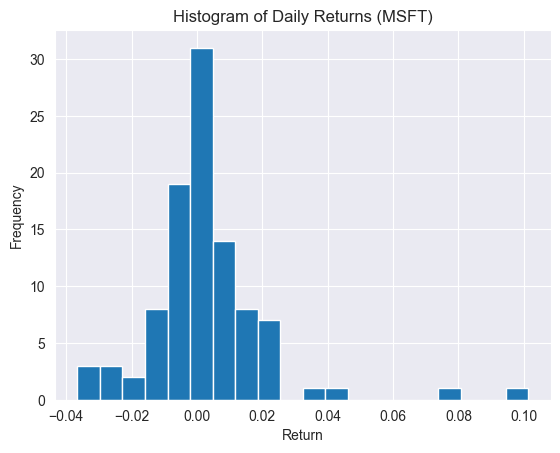

In [7]:
plt.figure()
plt.hist(df['return'], bins=20)
plt.title("Histogram of Daily Returns (MSFT)")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()

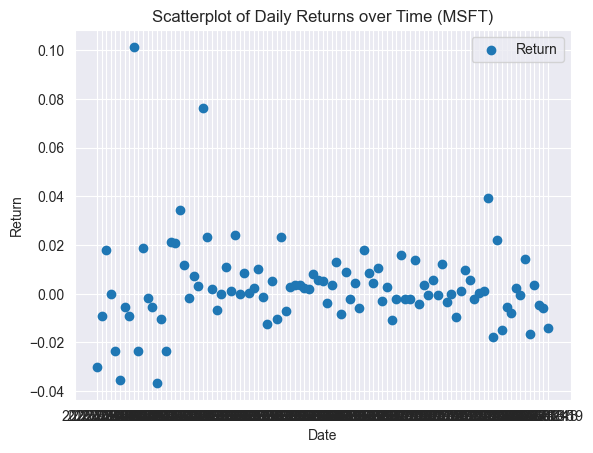

In [8]:
plt.figure()
plt.scatter(df['date'], df['return'], label="Return")
plt.title("Scatterplot of Daily Returns over Time (MSFT)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()

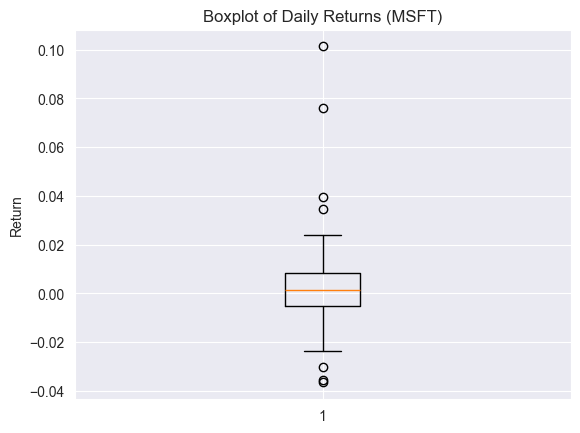

In [9]:
plt.figure()
plt.boxplot(df['return'])
plt.title("Boxplot of Daily Returns (MSFT)")
plt.ylabel("Return")
plt.show()

In [10]:
def iqr_outlier_mask(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (series < lower) | (series > upper)

ret_outliers = iqr_outlier_mask(df['return'])

In [11]:
ret_outliers

1      True
2     False
3     False
4     False
5     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: return, Length: 99, dtype: bool

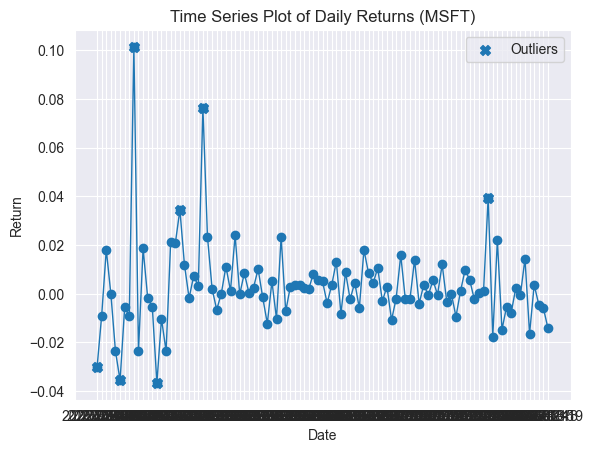

In [12]:
# The outliers are marked with X
plt.figure()
plt.plot(df['date'], df['return'], marker='o', linewidth=1)
plt.scatter(df.loc[ret_outliers, 'date'], df.loc[ret_outliers, 'return'], s=50, marker='X', label="Outliers")
plt.title("Time Series Plot of Daily Returns (MSFT)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()